In [3]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/MachineLearning/main/Datasets/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Vizualizar los valores unicos de todos los campos

In [7]:
df.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

Visualizar los valores nulos

In [9]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Podemos renombrar las columnas para entender mejor la informacion

In [11]:
df = df.rename(columns={'weathersit':'weather','yr':'year','mnth':'month','hum':'humidity','cnt':'count'})

In [ ]:
df.head(5)

Verificar que informacion no es relevante para el analisis y prediccion para la renta de bicicletas(instant-dteday-year)

In [14]:
df.drop(columns=['instant','dteday','year'])

,season,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Graficando datos

[Text(0.5, 1.0, 'Recuento de bicicletas durante diferentes días de la semana')]

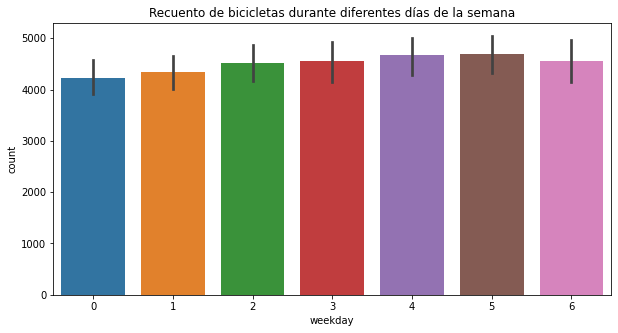

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=df,x='weekday',y='count',ax=ax)
ax.set(title='Recuento de bicicletas durante diferentes días de la semana')

Recuento de bicicletas durante diferentes meses

[Text(0.5, 1.0, 'Recuento de bicicletas durante diferentes meses')]

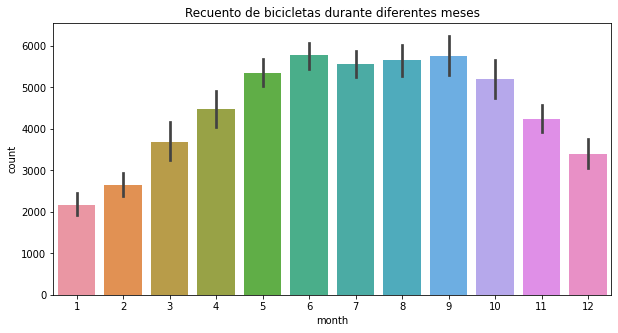

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=df,x='month',y='count',ax=ax)
ax.set(title='Recuento de bicicletas durante diferentes meses')

Recuento de bicicletas por meses

[Text(0.5, 1.0, 'Recuento de bicicletas por meses')]

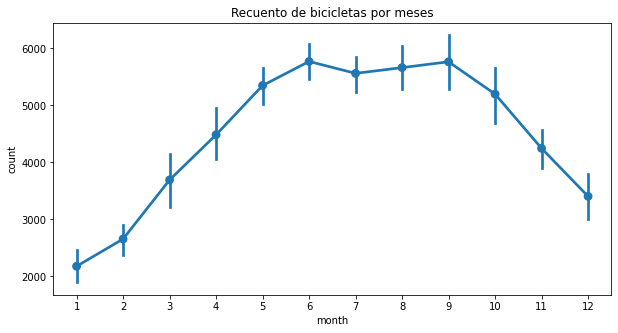

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

sns.pointplot(data=df,x='month',y='count',ax=ax)
ax.set(title='Recuento de bicicletas por meses')

Recuento de bicicletas durante dias de la semana

[Text(0.5, 1.0, 'Recuento de bicicletas durante dias de la semana')]

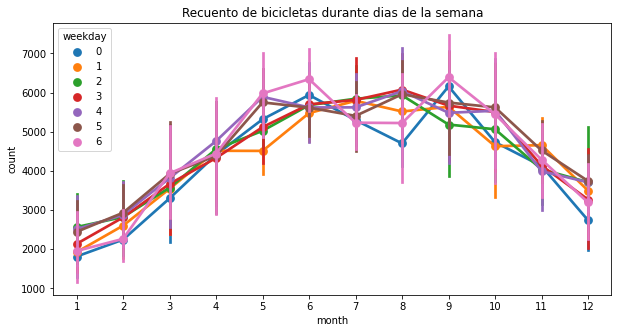

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
#hue => serie que queremos comparar 
sns.pointplot(data=df,x='month',y='count',hue='weekday',ax=ax)
ax.set(title='Recuento de bicicletas durante dias de la semana')

Recuento de bicicletas por meses y sesiones

[Text(0.5, 1.0, 'Recuento de bicicletas por meses y sesiones')]

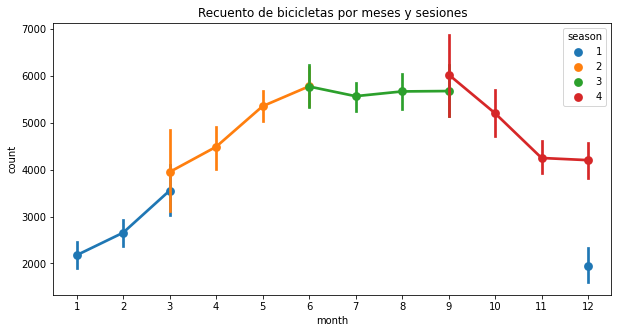

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
#hue => serie que queremos comparar 
sns.pointplot(data=df,x='month',y='count',hue='season',ax=ax)
ax.set(title='Recuento de bicicletas por meses y sesiones')

Recuento de bicicletas durante dias de la semana - renta de usiarios sin registrar

[Text(0.5, 1.0, 'Recuento de bicicletas pdurante dias de la semana - renta de usiarios sin registrar')]

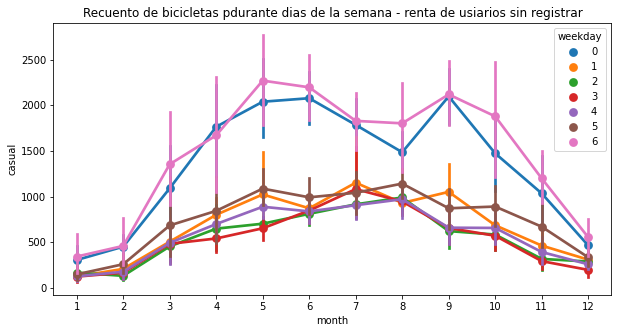

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
#hue => serie que queremos comparar 
sns.pointplot(data=df,x='month',y='casual',hue='weekday',ax=ax)
ax.set(title='Recuento de bicicletas durante dias de la semana - renta de usiarios sin registrar')

Recuento de bicicletas durante dias de la semana - renta de usiarios registrados

[Text(0.5, 1.0, 'Recuento de bicicletas pdurante dias de la semana - renta de usiarios registrados')]

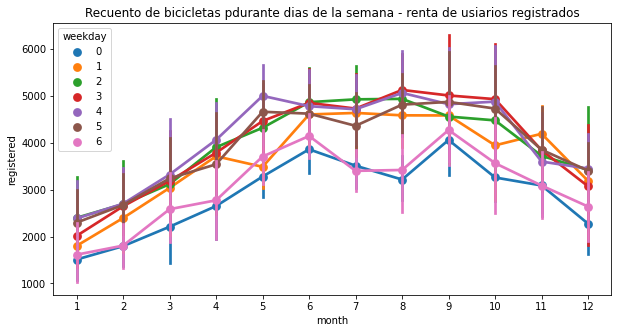

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
#hue => serie que queremos comparar 
sns.pointplot(data=df,x='month',y='registered',hue='weekday',ax=ax)
ax.set(title='Recuento de bicicletas durante dias de la semana - renta de usiarios registrados')

Como afecta el clima a las rentas

[Text(0.5, 1.0, 'Recuento de bicicletas durante diferentes tipos de clima')]

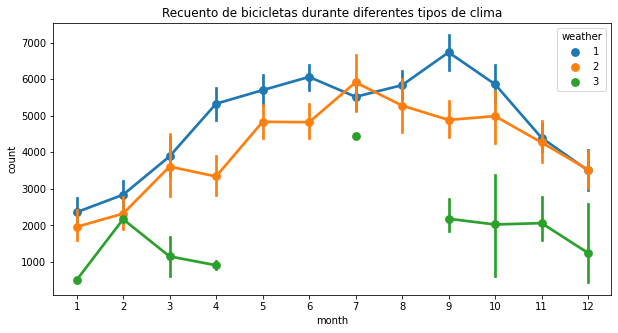

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
#hue => serie que queremos comparar 
sns.pointplot(data=df,x='month',y='count',hue='weather',ax=ax)
ax.set(title='Recuento de bicicletas durante diferentes tipos de clima')

[Text(0.5, 1.0, 'Relacion entre humedad y usuarios')]

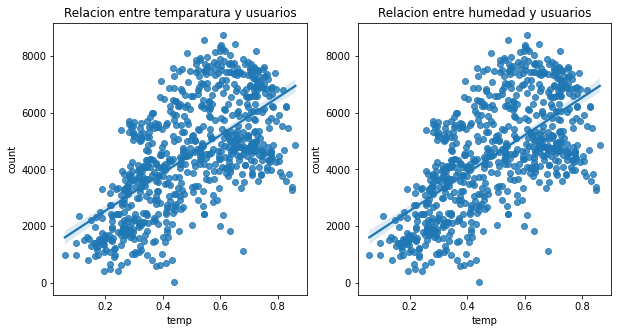

In [25]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))

sns.regplot(data=df,x='temp',y='count',ax=ax1)
ax1.set(title='Relacion entre temparatura y usuarios')
sns.regplot(data=df,x='temp',y='count',ax=ax2)
ax2.set(title='Relacion entre humedad y usuarios')

[Text(0.5, 1.0, 'Relacion entre humedad y usuarios')]

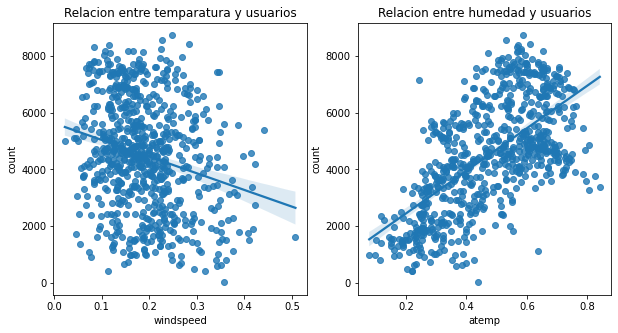

In [26]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))

sns.regplot(data=df,x='windspeed',y='count',ax=ax1)
ax1.set(title='Relacion entre velocidad del tiempo y usuarios')
sns.regplot(data=df,x='atemp',y='count',ax=ax2)
ax2.set(title='Relacion entre la sensacion de la tempreatura y usuarios')

Matriz de correlacion

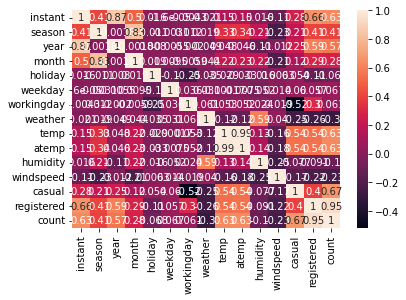

In [27]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

Para que se pueda visualizar bien la matriz de correlacion tomamos las variables categoricas(**Las variables categóricas hablan de tipos de información que podrían ser aislados en reuniones**.) y le aplicamos el siguiente codigo

In [ ]:
cols=['season','month','holiday','weekday','workingday','weather']
for col in cols:
  df[col]=df[col].astype('category')
df.info()

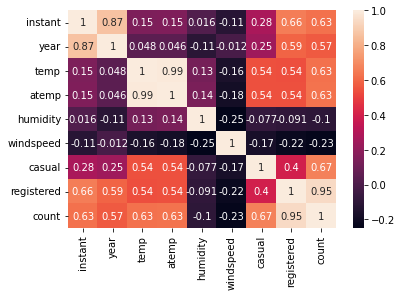

In [29]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

##Entrenando

In [ ]:
x = df.drop(columns=['instant','dteday','year','count','dteday'],axis = 1)
y = df.count
df.head()